In [61]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
import os, glob

In [62]:
path = '../DL_with_Pytorch/Chapter3/dogs-vs-cats'
files = glob.glob(os.path.join(path, '*/*.jpg'))

In [63]:
no_of_images = len(files)

In [64]:
shuffle = np.random.permutation(no_of_images)

In [65]:
# os.mkdir(os.path.join(path, 'valid'))

In [66]:
# for t in ['train', 'valid']:
#     for folder in ['dog/', 'cat/']:
#         os.mkdir(os.path.join(path, t, folder))

In [67]:
# for i in shuffle[:2000]:
#     folder = files[i].split('/')[-1].split('.')[0]
#     image = files[i].split('/')[-1]
#     os.rename(files[i], os.path.join(path, 'valid', folder, image))

In [68]:
# for i in shuffle[2000:]:
#     folder = files[i].split('/')[-1].split('.')[0]
#     image = files[i].split('/')[-1]
#     os.rename(files[i], os.path.join(path, 'train', folder, image))

In [69]:
### Loading data into Pytorch tensors ###
simple_transform = transforms.Compose([
    transforms.Scale((256,256)), # scale the size, should be 256, not 224
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                        [0.229, 0.224, 0.225])
])
train = ImageFolder('dogs-vs-cats/train', simple_transform) # read images
valid = ImageFolder('dogs-vs-cats/valid', simple_transform) # return PIL image Object

In [22]:
train.class_to_idx

{'cat': 0, 'dog': 1}

In [23]:
train.classes

['cat', 'dog']

In [59]:
def imshow(inp):
    inp = inp.numpy().transpose((1,2,0))
#     mean = np.array([0.485, 0.456, 0.406])
#     std = np.array([0.229, 0.224, 0.225])
#     inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    print(inp)
    plt.imshow(inp)

[[[1.         0.83543426 0.        ]
  [1.         0.87044823 0.        ]
  [1.         0.9229692  0.        ]
  ...
  [1.         1.         0.2870589 ]
  [1.         1.         0.32191727]
  [1.         1.         0.3044881 ]]

 [[1.         0.83543426 0.        ]
  [1.         0.87044823 0.        ]
  [1.         0.9229692  0.        ]
  ...
  [1.         1.         0.2870589 ]
  [1.         1.         0.33934647]
  [1.         1.         0.32191727]]

 [[1.         0.83543426 0.        ]
  [1.         0.87044823 0.        ]
  [1.         0.9229692  0.        ]
  ...
  [1.         1.         0.32191727]
  [1.         1.         0.33934647]
  [1.         1.         0.32191727]]

 ...

 [[0.5193082  0.11764706 0.        ]
  [0.5193082  0.11764706 0.        ]
  [0.5364329  0.13515405 0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.50218344 0.10014006 0.        ]
  [0.50218344 0.10014006 0.        ]


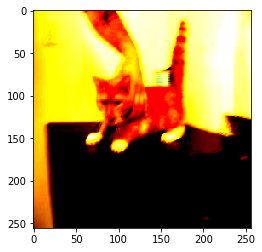

In [60]:
imshow(train[0][0])

In [ ]:
train_data_gen = torch.utils.data.DataLoader(train, batch_size=64, num_workers=3)
valid_data_gen = torch.utils.data.DataLoader(train, batch_size=64, num_workers=3)

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

is_cuda = torch.cuda.is_available()
if is_cuda:
    model_ft = model_ft.cuda()

In [ ]:
model_ft

In [ ]:
model_ft.fc = nn.Linear(num_ftrs, 2)